In [ ]:
#%pip install pandas numpy matplotlib seaborn scikit-learn

<h1> Imports and reading data </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


data_features = pd.read_csv('Data/features.csv')
data_stores= pd.read_csv('Data/stores.csv')
data_train = pd.read_csv('Data/train.csv')

<h1> Data preparation </h1>

In [52]:
data_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [46]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [89]:
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Percentage of missing data

In [112]:
#data_stores.isna().sum()
#data_train.isna().sum()
(data_features.isna().sum() / len(data_features)) * 100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

In [119]:
print(data_stores.duplicated().sum())
print(data_features.duplicated().sum())
print(data_train.duplicated().sum())

0
0
0


<h1> Sales distribution </h1>

In [98]:
data_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


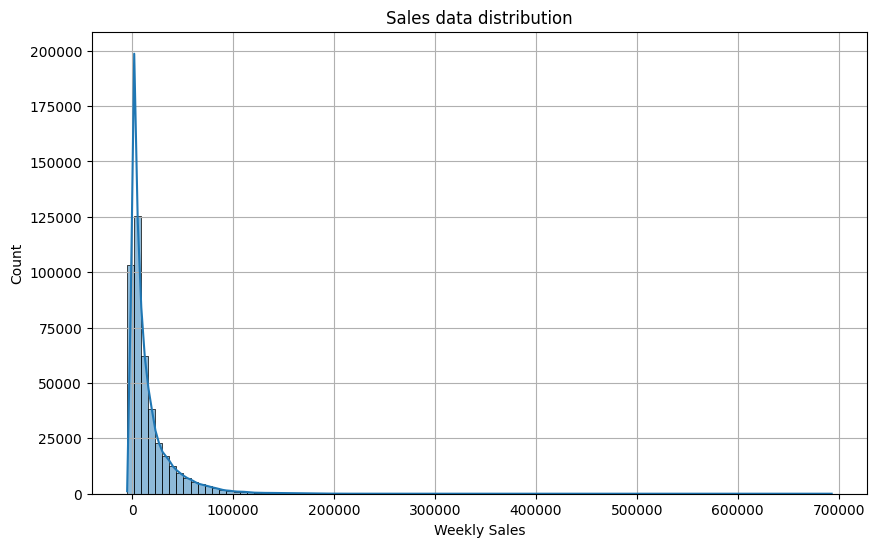

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Weekly_Sales'], bins=100, kde=True)
plt.title('Sales data distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.grid(True)
plt.show()

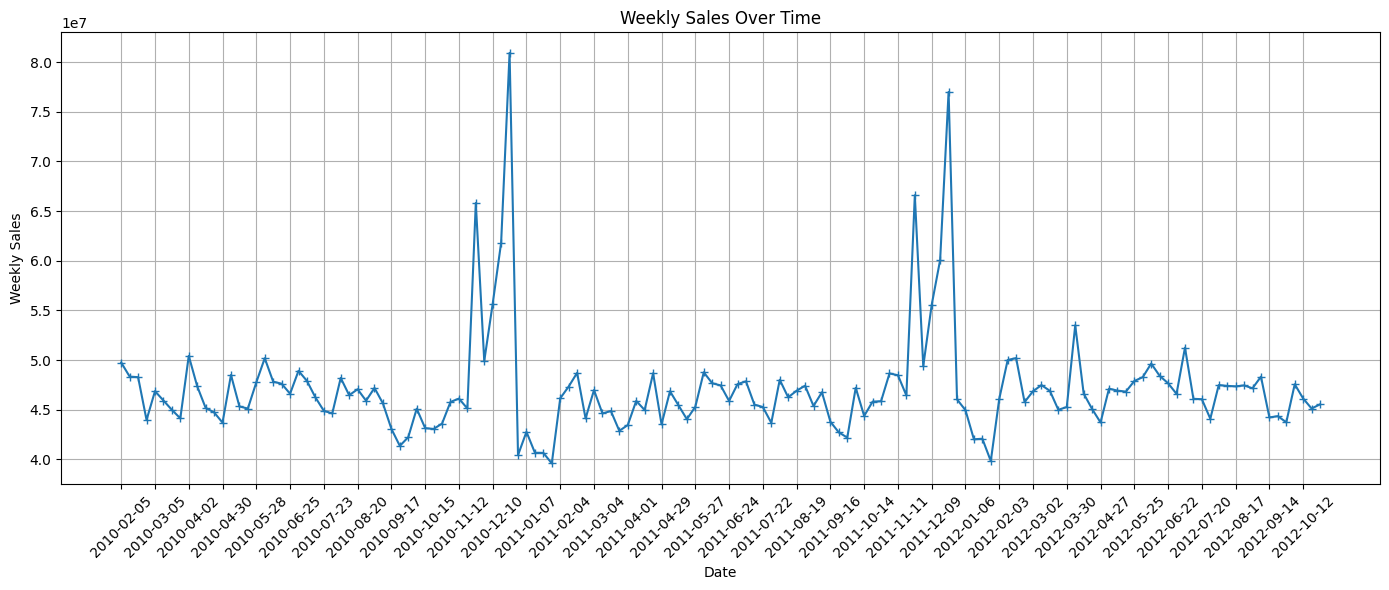

In [4]:
data_train_sorted = data_train.sort_values(by='Date')
sales_by_date = data_train_sorted.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], marker='+', linestyle='-')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.tight_layout()
plt.show()

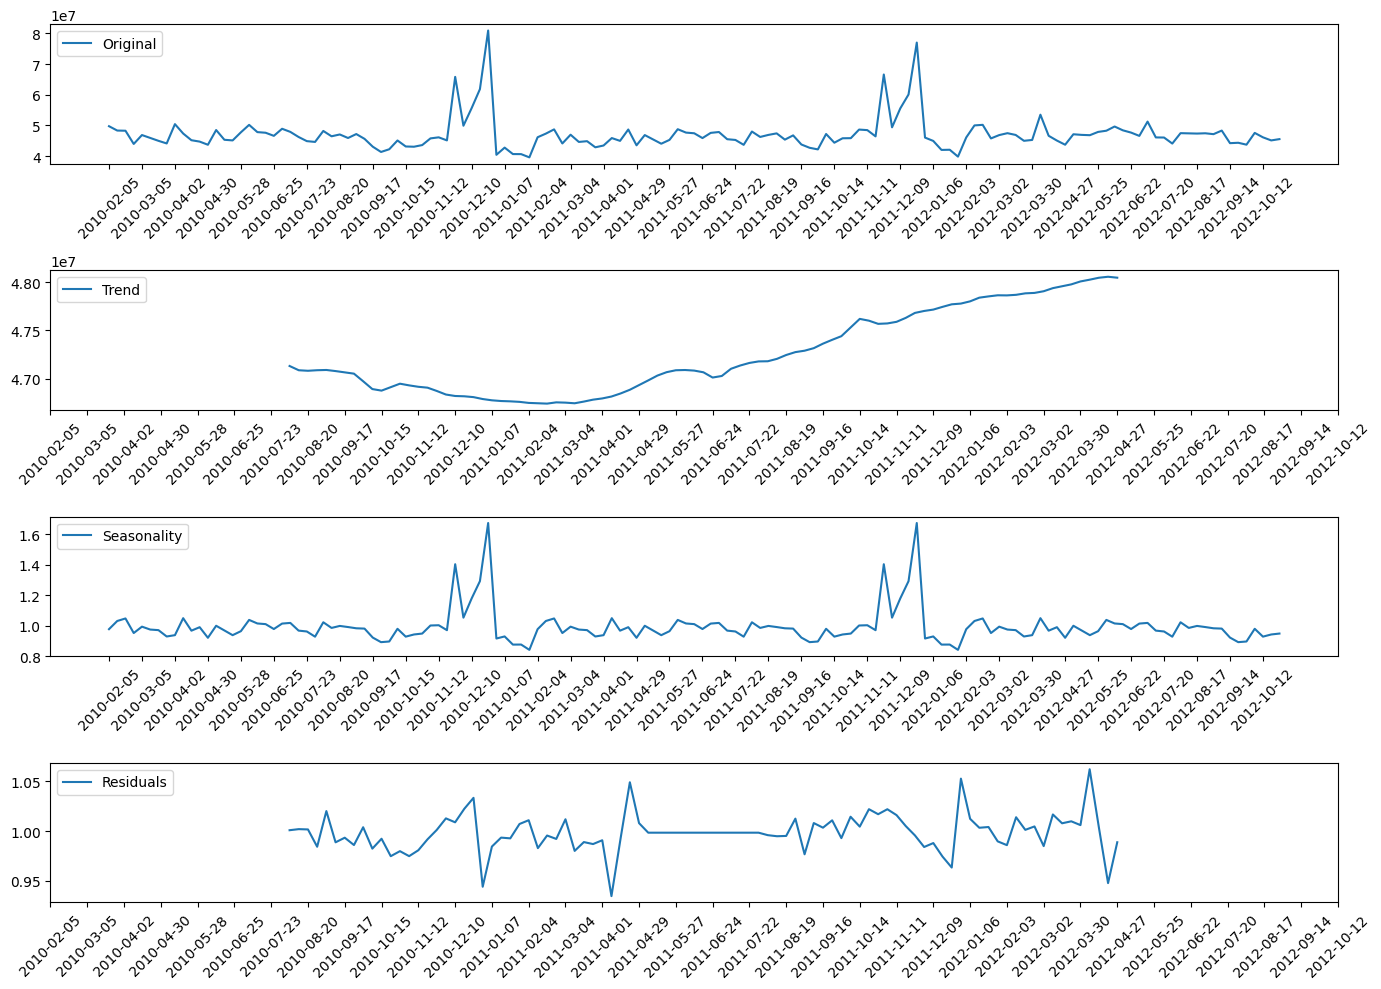

In [6]:
result = seasonal_decompose(sales_by_date['Weekly_Sales'], model='multiplicative', period=52)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], label='Original')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(sales_by_date['Date'], result.trend, label='Trend')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(sales_by_date['Date'], result.seasonal, label='Seasonality')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(sales_by_date['Date'], result.resid, label='Residuals')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

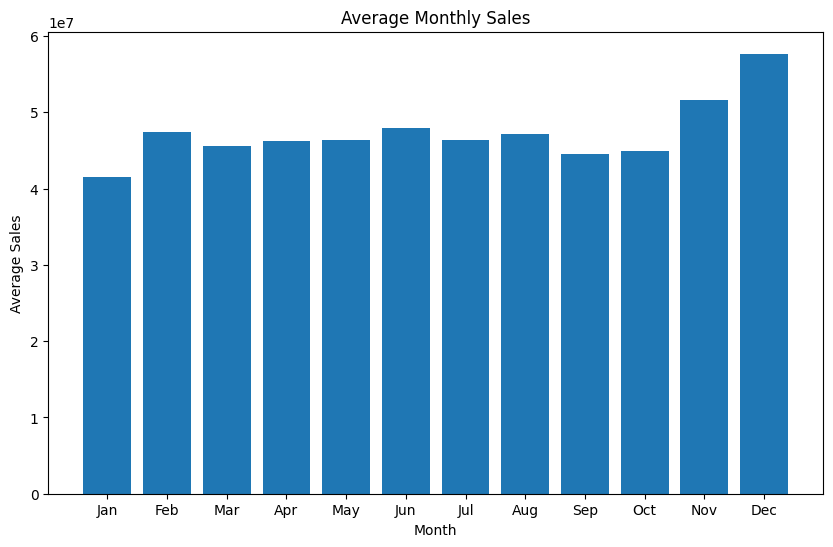

In [21]:
sales_by_date['Date'] = pd.to_datetime(sales_by_date['Date'])
sales_by_month = sales_by_date.groupby(sales_by_date['Date'].dt.month)['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
plt.bar(sales_by_month.index, sales_by_month.values)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [51]:
merged_data= pd.merge(data_train, data_features, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_data = pd.merge(merged_data, data_stores, on='Store', how='left')
merged_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


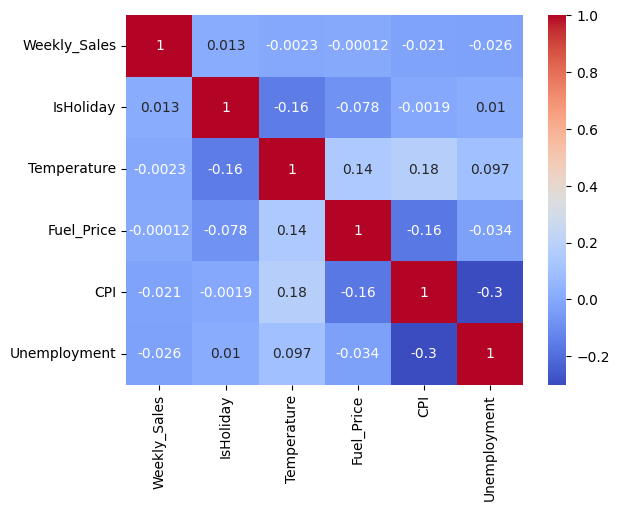

In [38]:
cor_features = merged_data[['Weekly_Sales','IsHoliday','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(cor_features, annot=True, cmap='coolwarm')
plt.show()

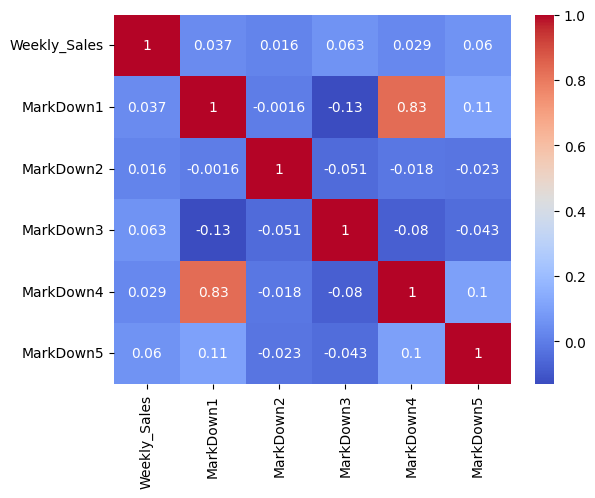

In [37]:
cor_markdown = merged_data[['Weekly_Sales', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].dropna().corr()
sns.heatmap(cor_markdown, annot=True, cmap='coolwarm')
plt.show()

<h1> 2 </h1>


In [6]:
#%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
